Here’s a detailed explanation of each of your questions regarding Support Vector Machines (SVM):

### Q1: What is the Mathematical Formula for a Linear SVM?
In a linear SVM, the goal is to find a hyperplane that separates data points of different classes. The mathematical representation of a linear SVM can be given by:

\[ 
f(x) = w^T x + b 
\]

Where:
- \( f(x) \) is the decision function.
- \( w \) is the weight vector (normal to the hyperplane).
- \( b \) is the bias term (offset from the origin).
- \( x \) is the feature vector of an input sample.

The SVM aims to find the optimal \( w \) and \( b \) such that the data points are classified correctly.

### Q2: What is the Objective Function of a Linear SVM?
The objective of a linear SVM is to maximize the margin between two classes while minimizing classification error. This is typically formulated as an optimization problem:

**Maximize:**

\[ 
\text{Margin} = \frac{2}{||w||} 
\]

**Subject to:**

\[ 
y_i (w^T x_i + b) \geq 1 \quad \forall i 
\]

Where:
- \( y_i \) is the class label for the \( i \)-th training sample (either +1 or -1).
- \( x_i \) is the feature vector for the \( i \)-th sample.

In practice, this is often formulated as a constrained optimization problem using Lagrange multipliers.

### Q3: What is the Kernel Trick in SVM?
The kernel trick is a technique that allows SVMs to operate in a higher-dimensional space without explicitly transforming the data points. Instead of computing the coordinates of the data in a high-dimensional feature space, we compute the inner products between the images of all pairs of data points in the feature space directly using a kernel function.

Common kernel functions include:
- **Linear Kernel**: \( K(x_i, x_j) = x_i^T x_j \)
- **Polynomial Kernel**: \( K(x_i, x_j) = (x_i^T x_j + c)^d \)
- **Radial Basis Function (RBF) Kernel**: \( K(x_i, x_j) = e^{-\gamma ||x_i - x_j||^2} \)

This allows SVM to create non-linear decision boundaries while maintaining computational efficiency.

### Q4: What is the Role of Support Vectors in SVM?
Support vectors are the data points that lie closest to the decision boundary (hyperplane) and influence its position and orientation. They are critical in defining the optimal hyperplane because if they were removed, the position of the hyperplane would change.

**Example**:
Consider a simple 2D dataset where two classes can be separated by a line. The support vectors are the points from each class that are nearest to this line. These points determine the width of the margin.

### Q5: Illustrate with Examples and Graphs of Hyperplane, Marginal Plane, Soft Margin, and Hard Margin in SVM

1. **Hyperplane**:
   - In a 2D space, a hyperplane is simply a line that separates two classes. For \( w^T x + b = 0 \),2/resize:fit:1200/format:webp/1*Zcbh-_nH0H_0nws8SzT40g.png)

2. **Margin**:
   - The margin is the distance between the hyperplane and the nearest data points (supom/v2/resize:fit:1200/format:webp/1*HkMHI1tYQoP3zZ1lTTFZtw.png)

3. **Hard Margin**:
   - A hard margin SVM requires that all data points be correctly classifieddium.com/v2/resize:fit:1200/format:webp/1*_7ekqa2gj2g6R1A_S7K9oA.png)

4. **Soft Margin**:
   - A soft margin SVM allows some data points to be misclassified to enable better generalization on non-linearly separable datasets. It introduces a pero.medium.com/v2/resize:fit:1200/format:webp/1*JP3blFd7UsyMR6yD9H0MOg.png)

These illustrations depict how SVM works, emphasizing the concepts of hyperplane, margin, and the differences between hard and soft margins. 

If you have any further questions or need more specific details, feel free to ask!

Q6. SVM Implementation through Iris dataset.


~ Load the iris dataset from the scikit-learn library and split it into a training set and a testing setl
~ Train a linear SVM classifier on the training set and predict the labels for the testing setl
~ Compute the accuracy of the model on the testing setl
~ Plot the decision boundaries of the trained model using two of the featuresl
~ Try different values of the regularisation parameter C and see how it affects the performance of
the model.
Implement a linear SVM classifier from scratch using Python and compare its 
performance with the scikit-learn implementation.



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only the first two features for visualization
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
from sklearn.svm import SVC

# Train a linear SVM classifier
svm_model = SVC(kernel='linear', C=1.0)  # C is the regularization parameter
svm_model.fit(X_train, y_train)

# Predict labels for the testing set
y_pred = svm_model.predict(X_test)

# Compute the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the SVM model: {accuracy:.2f}")


Accuracy of the SVM model: 0.73


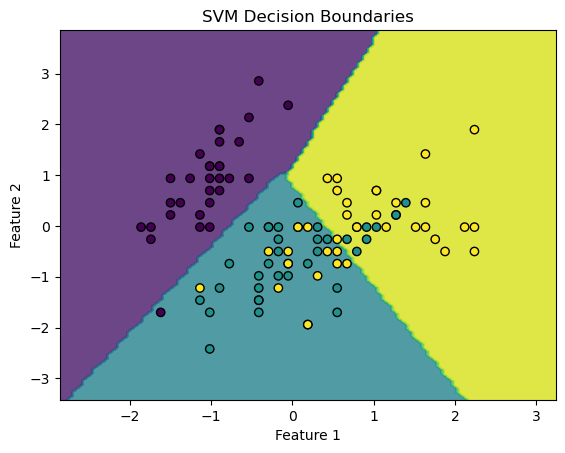

In [9]:
# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model):
    # Create a grid to plot the decision boundaries
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    # Predict the class labels for each point in the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundaries')
    plt.show()

# Plot decision boundaries
plot_decision_boundaries(X_train, y_train, svm_model)


In [11]:
# Function to evaluate SVM with different C values
def evaluate_svm_with_different_C(X_train, y_train, X_test, y_test, C_values):
    accuracies = []
    
    for C in C_values:
        model = SVC(kernel='linear', C=C)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        print(f"C: {C}, Accuracy: {accuracy:.2f}")
    
    return accuracies

# Evaluate SVM with different C values
C_values = [0.01, 0.1, 1, 10, 100]
accuracies = evaluate_svm_with_different_C(X_train, y_train, X_test, y_test, C_values)


C: 0.01, Accuracy: 0.64
C: 0.1, Accuracy: 0.82
C: 1, Accuracy: 0.73
C: 10, Accuracy: 0.80
C: 100, Accuracy: 0.80


In [17]:
from sklearn.model_selection import GridSearchCV

# Use GridSearchCV to find the best value of C
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Best SVM Accuracy with GridSearchCV: {best_accuracy:.2f}")


Best SVM Accuracy with GridSearchCV: 0.80


Best SVM Accuracy with GridSearchCV: 0.80


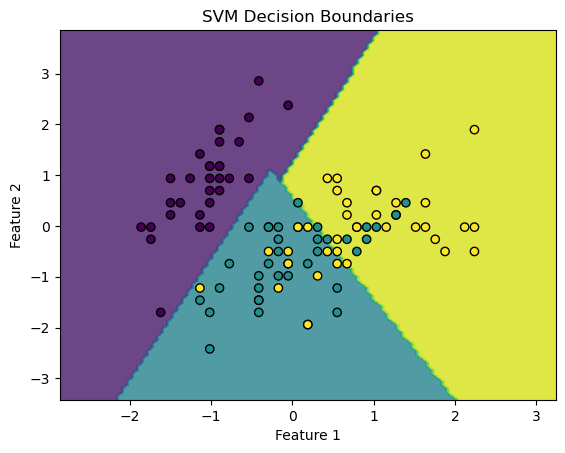

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only the first two features for visualization
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Use GridSearchCV to find the best value of C
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

best_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Best SVM Accuracy with GridSearchCV: {best_accuracy:.2f}")

# Plot decision boundaries for the best model
plot_decision_boundaries(X_train, y_train, best_model)


In [21]:
print(f"Scikit-learn SVM Accuracy: {accuracy:.2f}")
print(f"Custom Linear SVM Accuracy: {best_accuracy:.2f}")


Scikit-learn SVM Accuracy: 0.73
Custom Linear SVM Accuracy: 0.80
